In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Dell\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Dell\AppData\Local\Temp\ipykernel_940\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df=pd.read_csv('evaluation.csv')
df.head()

,Unnamed: 0,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.
0,0,1995,6,22,2.00,165.0,-3.3,-1.9,79.4,28.95
1,1,1995,1,13,4.99,156.0,-3.5,-2.2,82.0,27.86
2,2,1995,7,9,-4.97,-125.0,-8.2,1.5,84.2,26.02
3,3,1996,7,17,8.01,165.0,-5.4,-1.0,84.1,28.38
4,4,1993,8,23,2.06,165.0,2.0,0.6,75.4,28.47


In [4]:
df.isnull().sum()

Unnamed: 0       0
year             0
month            0
day              0
latitude         0
longitude        0
zon.winds     3683
mer.winds     3683
humidity      9738
air temp.     2047
dtype: int64

In [5]:
#sort the data chronologically
df['date']=pd.to_datetime(df[['year','month','day']])
df=df.sort_values(by='date').reset_index(drop=True)
df.head()

,Unnamed: 0,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,date
0,4951,1980,3,7,-0.02,-109.44,-6.8,0.7,NaN,26.14,1980-03-07
1,16738,1980,3,11,-0.02,-109.44,-4.2,1.5,NaN,25.30,1980-03-11
2,10752,1980,8,27,0.00,-109.56,-3.8,3.7,NaN,22.36,1980-08-27
3,5289,1980,8,29,0.00,-109.56,-5.0,2.4,NaN,22.45,1980-08-29
4,2392,1980,8,31,0.00,-109.56,-6.2,5.1,NaN,23.12,1980-08-31


In [6]:
#add another feature indicating ellapsed time
df = df.sort_values(by='date').reset_index(drop=True)
df['time_elapsed'] = (df['date'] - df['date'].min()).dt.days
df.drop(columns=['date'],inplace=True)

c:\Users\Dell\anaconda3_original\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


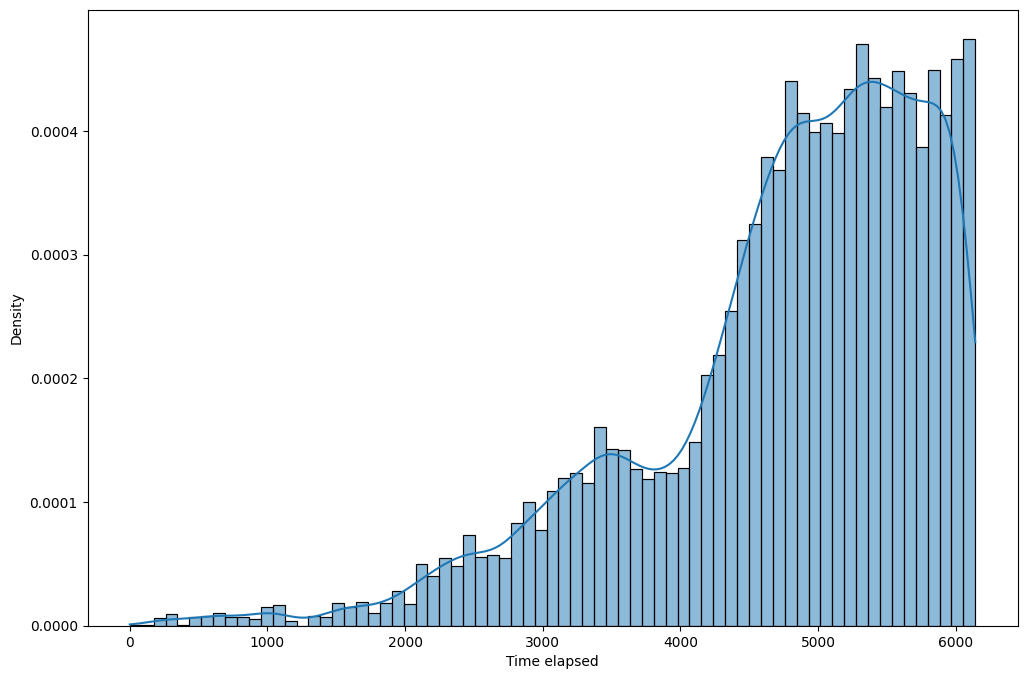

In [7]:
plt.figure(figsize=(12,8))
sns.histplot(x='time_elapsed',data=df,kde=True,stat='density')
plt.xlabel('Time elapsed')
plt.ylabel('Density')    
plt.show()